In [1]:
import pandas as pd
import numpy as np

In [3]:
retail_df = pd.read_csv("./retail_sales.csv")

retail_df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


In [ ]:
retail_df["sale_date"] = retail_df["sale_date"] + " "+  retail_df["sale_time"]


,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05 10:47:00,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09 11:00:00,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12 10:48:00,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06 08:53:00,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14 08:35:00,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [7]:
retail_df = retail_df.drop("sale_time", axis=1)

retail_df["sale_date"] = pd.to_datetime(retail_df["sale_date"])


In [10]:
retail_df.head()

,transactions_id,sale_date,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05 10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09 11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12 10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06 08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14 08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [16]:
retail_df["sale_month"] = retail_df["sale_date"].dt.strftime('%Y-%m') +"-01"

retail_df["cohort_month"] = retail_df.groupby("customer_id")["sale_month"].transform("min")

retail_df.head()

,transactions_id,sale_date,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale,sale_month,cohort_month
0,180,2022-11-05 10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2022-11-01,2022-05-01
1,522,2022-07-09 11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0,2022-07-01,2022-01-01
2,559,2022-12-12 10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0,2022-12-01,2022-02-01
3,1180,2022-01-06 08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2022-01-01,2022-01-01
4,1522,2022-11-14 08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0,2022-11-01,2022-02-01


In [19]:
retail_df["sale_month"] = pd.to_datetime(retail_df["sale_month"])
retail_df["cohort_month"] = pd.to_datetime(retail_df["cohort_month"])

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactions_id  2000 non-null   int64         
 1   sale_date        2000 non-null   datetime64[ns]
 2   customer_id      2000 non-null   int64         
 3   gender           2000 non-null   object        
 4   age              1990 non-null   float64       
 5   category         2000 non-null   object        
 6   quantiy          1997 non-null   float64       
 7   price_per_unit   1997 non-null   float64       
 8   cogs             1997 non-null   float64       
 9   total_sale       1997 non-null   float64       
 10  sale_month       2000 non-null   datetime64[ns]
 11  cohort_month     2000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(2)
memory usage: 187.6+ KB


In [24]:
retail_df["cohort_index"] = (retail_df["sale_month"].dt.year - retail_df["cohort_month"].dt.year) * 12 + (retail_df["sale_month"].dt.month - retail_df['cohort_month'].dt.month+1)

retail_df.head()

,transactions_id,sale_date,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale,sale_month,cohort_month,sale_year,sale_months,cohort_year,cohort_months,cohort_index
0,180,2022-11-05 10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2022-11-05 10:47:00,2022-05-01,2022,11,2022,5,7
1,522,2022-07-09 11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0,2022-07-09 11:00:00,2022-01-01,2022,7,2022,1,7
2,559,2022-12-12 10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0,2022-12-12 10:48:00,2022-02-01,2022,12,2022,2,11
3,1180,2022-01-06 08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0,2022-01-06 08:53:00,2022-01-01,2022,1,2022,1,1
4,1522,2022-11-14 08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0,2022-11-14 08:35:00,2022-02-01,2022,11,2022,2,10


In [37]:
# result = retail_df.pivot(index="cohort_index", columns="cohort_index", values="")

cohort_table = retail_df.groupby(["cohort_month", "cohort_index"])["customer_id"].nunique().reset_index(name="total_customers")


cohort_analysis = cohort_table.pivot(index="cohort_month", columns="cohort_index", values="total_customers")


# cohort_analysis["cohort_month"] = cohort_analysis["cohort_month"].dt.strftime('%Y-%m-%d')

cohort_analysis

cohort_index,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
cohort_month,,,,,,,,,,,,,,,,,,,,,
2022-01-01,49.0,12.0,16.0,18.0,9.0,14.0,10.0,13.0,33.0,25.0,...,7.0,11.0,12.0,10.0,14.0,12.0,30.0,25.0,18.0,20.0
2022-02-01,27.0,8.0,6.0,11.0,6.0,7.0,13.0,13.0,16.0,13.0,...,5.0,8.0,5.0,6.0,6.0,12.0,15.0,15.0,14.0,NaN
2022-03-01,18.0,7.0,5.0,5.0,4.0,8.0,8.0,10.0,10.0,8.0,...,NaN,5.0,5.0,5.0,5.0,11.0,10.0,8.0,NaN,NaN
2022-04-01,15.0,4.0,4.0,4.0,4.0,8.0,7.0,13.0,10.0,5.0,...,4.0,4.0,4.0,10.0,10.0,8.0,7.0,NaN,NaN,NaN
2022-05-01,15.0,1.0,6.0,1.0,4.0,7.0,6.0,6.0,3.0,1.0,...,6.0,2.0,7.0,5.0,6.0,6.0,NaN,NaN,NaN,NaN
2022-06-01,8.0,1.0,3.0,7.0,6.0,6.0,4.0,1.0,1.0,NaN,...,NaN,4.0,5.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
2022-07-01,8.0,2.0,4.0,5.0,5.0,3.0,3.0,3.0,1.0,2.0,...,3.0,2.0,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,4.0,3.0,4.0,2.0,4.0,1.0,NaN,2.0,NaN,1.0,...,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,4.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


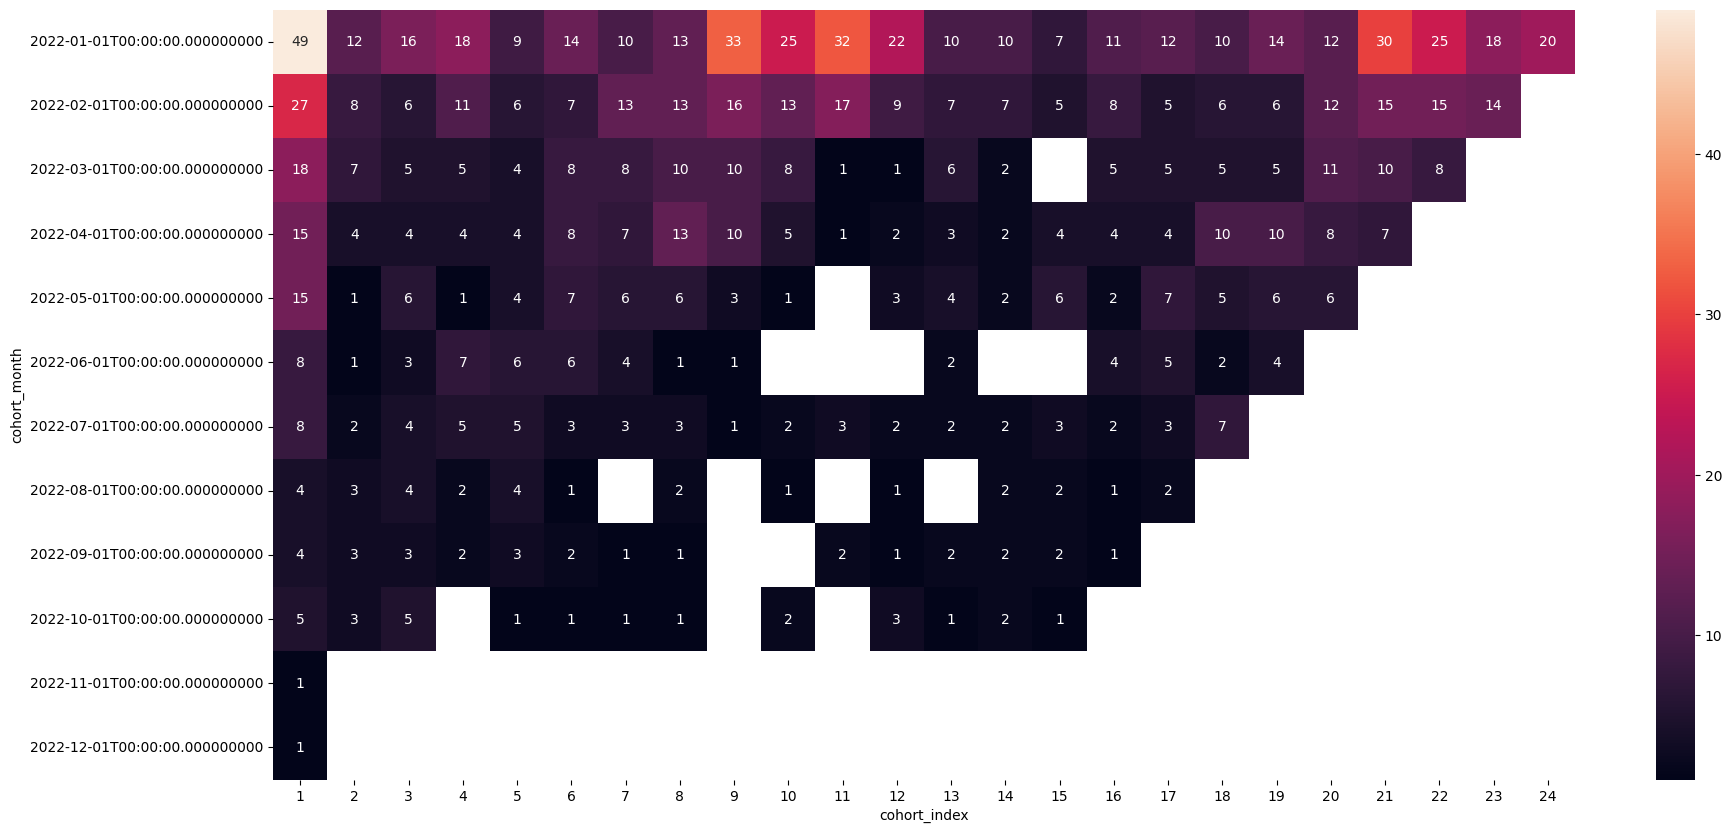

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt


plt.figure(figsize=(21, 10))
sns.heatmap(cohort_analysis, annot=True)
plt.show()